In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline    
# we can store the plots in notebook it self

In [3]:


#Read the data
cars = pd.read_csv("Cars.csv")
cars.head()



,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.corr()       #correlation between two continuos data will always lie in between -1 to +1
#if the correlation is close to -1 then it is negative correlation
#if the correlation is close to +1 then it is positive correlation
#if the correlation is 0 then it is uncorrelation

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


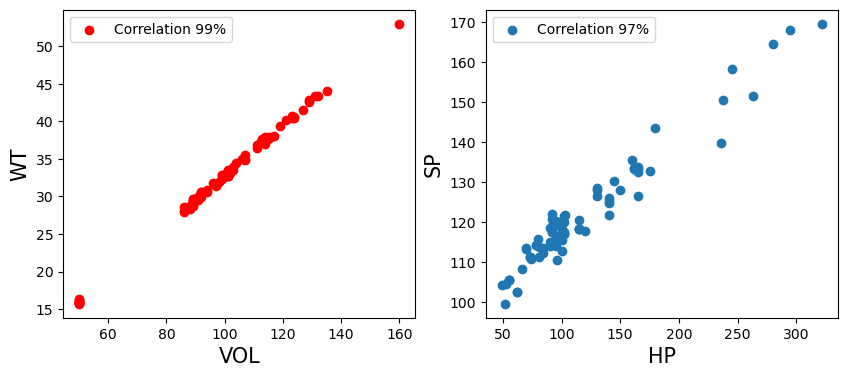

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(cars["VOL"],cars["WT"],color="red",label="Correlation 99%")
plt.xlabel("VOL",size=15)
plt.ylabel("WT",size=15)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(cars["HP"],cars["SP"],label="Correlation 97%")
plt.xlabel("HP",size=15)
plt.ylabel("SP",size=15)
plt.legend(loc="best")

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
#check for null values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

<AxesSubplot:>

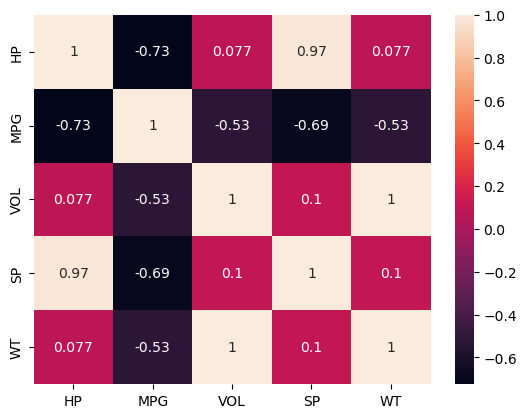

In [8]:
sns.heatmap(cars.corr(),annot=True)

# Scatterplot between variables along with histograms

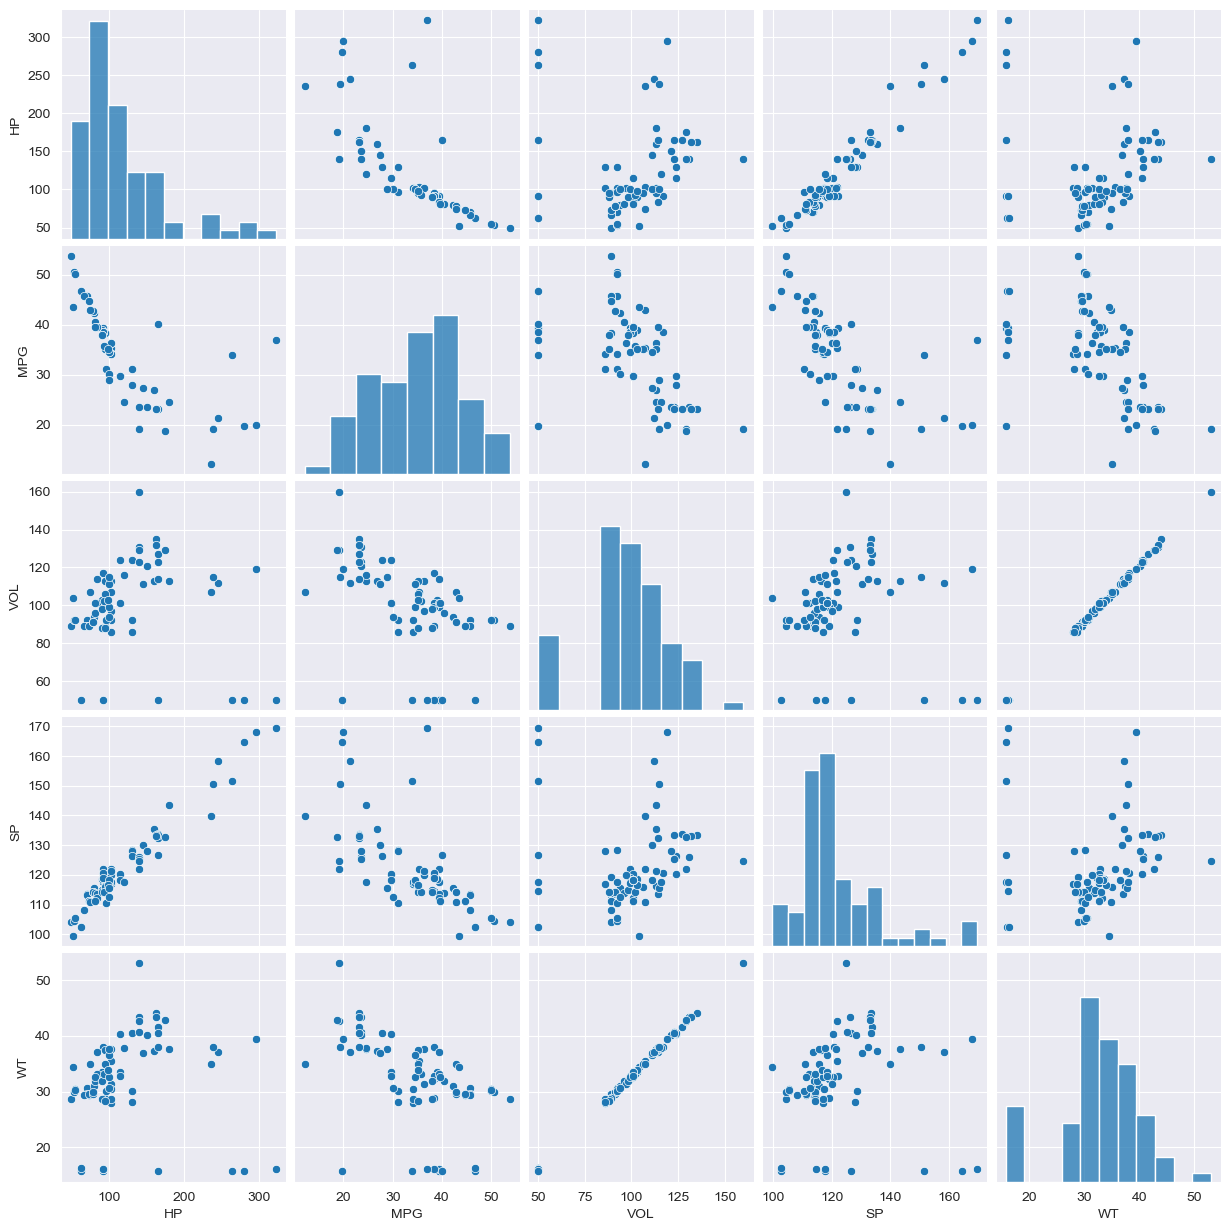

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [10]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [11]:
model.rsquared

0.7705372737359844

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.54e-23
Time:                        10:11:59   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
"""
-> coefficients of WT and SP are not making sense because as WT increases mailage should be reduced
->p value is high for WT and VOL 



ypred =a1x1+a2x2+a3x3+a4x4+b

ho:a1=0    ===> 0.814 
h1:a1!=0 

ho:a2=0    ===> 0.556
h1:a2!=0 

ho:a3=0    ===> 0.0015 
h1:a3!=0 
"""

'\n-> coefficients of WT and SP are not making sense because as WT increases mailage should be reduced\n->p value is high for WT and VOL \n\n\n\nypred =a1x1+a2x2+a3x3+a4x4+b\n\nho:a1=0    ===> 0.814 \nh1:a1!=0 \n\nho:a2=0    ===> 0.556\nh1:a2!=0 \n\nho:a3=0    ===> 0.0015 \nh1:a3!=0 \n'

# Calculating VIF

In [14]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 19

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 625

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  624

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  20

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


'''


x1,x2,x3,x4

x2,x3 high VIF

X1,X4 LOW vif 

-->x2,X1,X4

-->x3,X1,X4

'''

'''
{x1,x2,x3,x4,x5}

VIF is high -->{x1,x2,x3}

VIF is low -->{x4,x5}

-->x1,x4,x5
-->x2,x4,x5
-->x3,x4,x5
-->x1,x2,x4,x5
-->x1,x3,x4,x5
-->x2,x3,x4,x5
-->x4,x5


pvalue should be on the lower side and we should have r**2 high

'''

# treatment for multicollinearity 

In [15]:
import statsmodels.formula.api as smf 
model = smf.ols('MPG~VOL+np.log(HP)',data=cars).fit()

#MPG~VOL+HP  this is the best subset so we are using this
#MPG~WT+HP
#MPG~VOL+SP
#MPG~WT+SP

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           6.65e-33
Time:                        10:12:00   Log-Likelihood:                -216.64
No. Observations:                  81   AIC:                             439.3
Df Residuals:                      78   BIC:                             446.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.2907      4.577     28.027      0.000     119.178     137.404
VOL           -0.1556      0.018     -8.513      0.000      -0.192      -0.119
np.log(HP)   -16.8000      0.974    -17.247      0.000     -18.739     -14.861
==============================================================================
Omnibus:                        6.263   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                7.671
Skew:                           0.320   Prob(JB):                       0.0216
Kurtosis:                       4.365   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#import statsmodels.formula.api as smf 
#model = smf.ols('MPG~WT+HP',data=cars).fit()
#model.summary()

In [18]:
#import statsmodels.formula.api as smf 
#model = smf.ols('MPG~VOL+SP',data=cars).fit()
#model.summary()

In [19]:
#import statsmodels.formula.api as smf 
#model = smf.ols('MPG~WT+SP',data=cars).fit()
#model.summary()

In [20]:
print(smf.ols("MPG~VOL+HP",data=cars).fit().rsquared)
print(smf.ols("MPG~WT+HP",data=cars).fit().rsquared)
print(smf.ols("MPG~VOL+SP",data=cars).fit().rsquared)
print(smf.ols("MPG~WT+SP",data=cars).fit().rsquared)

0.7506606277376424
0.7490973272857679
0.6849073714078721
0.6826231212746163


# Residual Analysis

In [21]:
#excel --> df. ---> csv 

## Test for Normality of Residuals (Q-Q Plot)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

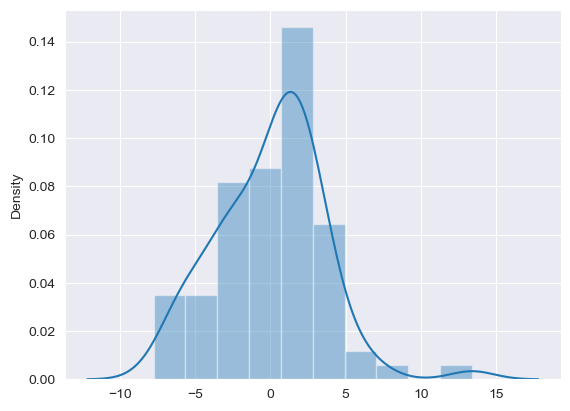

In [46]:
#plt.hist(model.resid,bins=20)   
sns.distplot(model.resid)
#resid= error of the model

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff7b653940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff7b653ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff7b7c84f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff7b6624c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff7b662790>],
 'means': []}

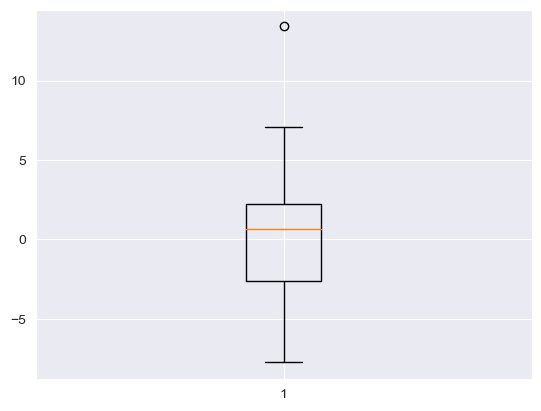

In [23]:
plt.boxplot(model.resid)

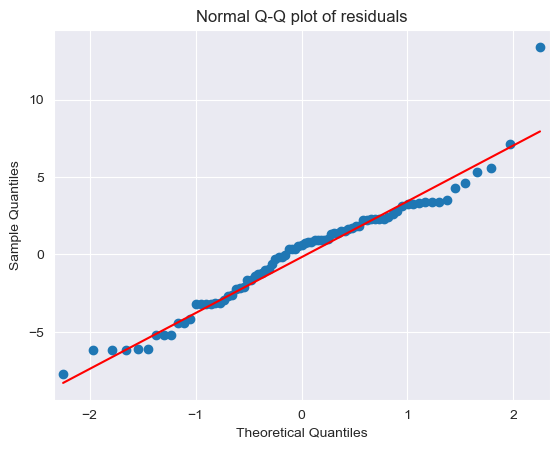

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
# line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity feature 4

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

#minmax scaler
#robust scaler used when outliers 

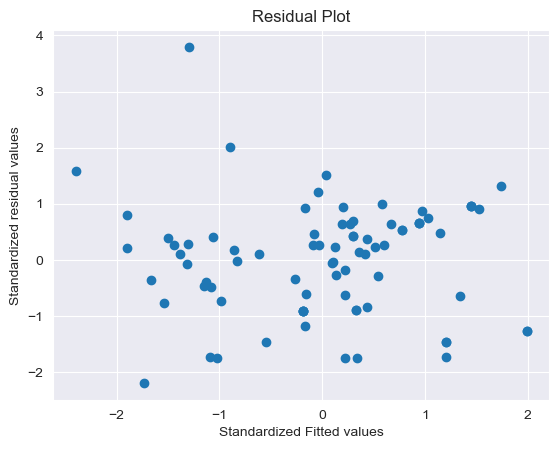

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid)) #Plotting yhat and error

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')   
#fitted = predicted
plt.ylabel('Standardized residual values')
plt.show()

In [27]:
# plt.scatter(get_standardized_values(cars.MPG),
#             get_standardized_values(model.resid))

# plt.title('Residual Plot')
# plt.xlabel('Standardized Actual values')
# plt.ylabel('Standardized residual values')
# plt.show()

## Residual Vs Regressors feature 2

eval_env: 1


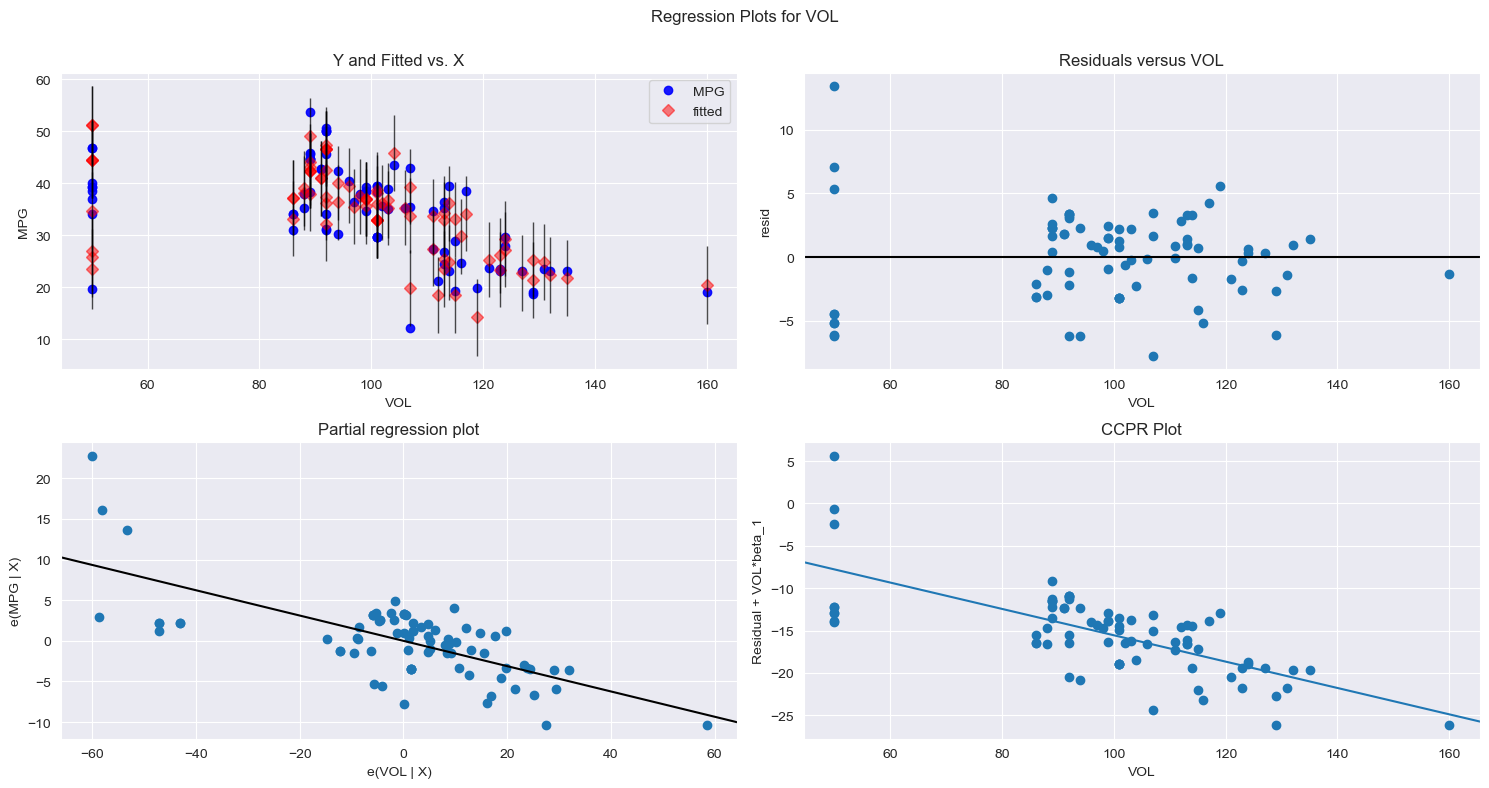

In [28]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()


eval_env: 1


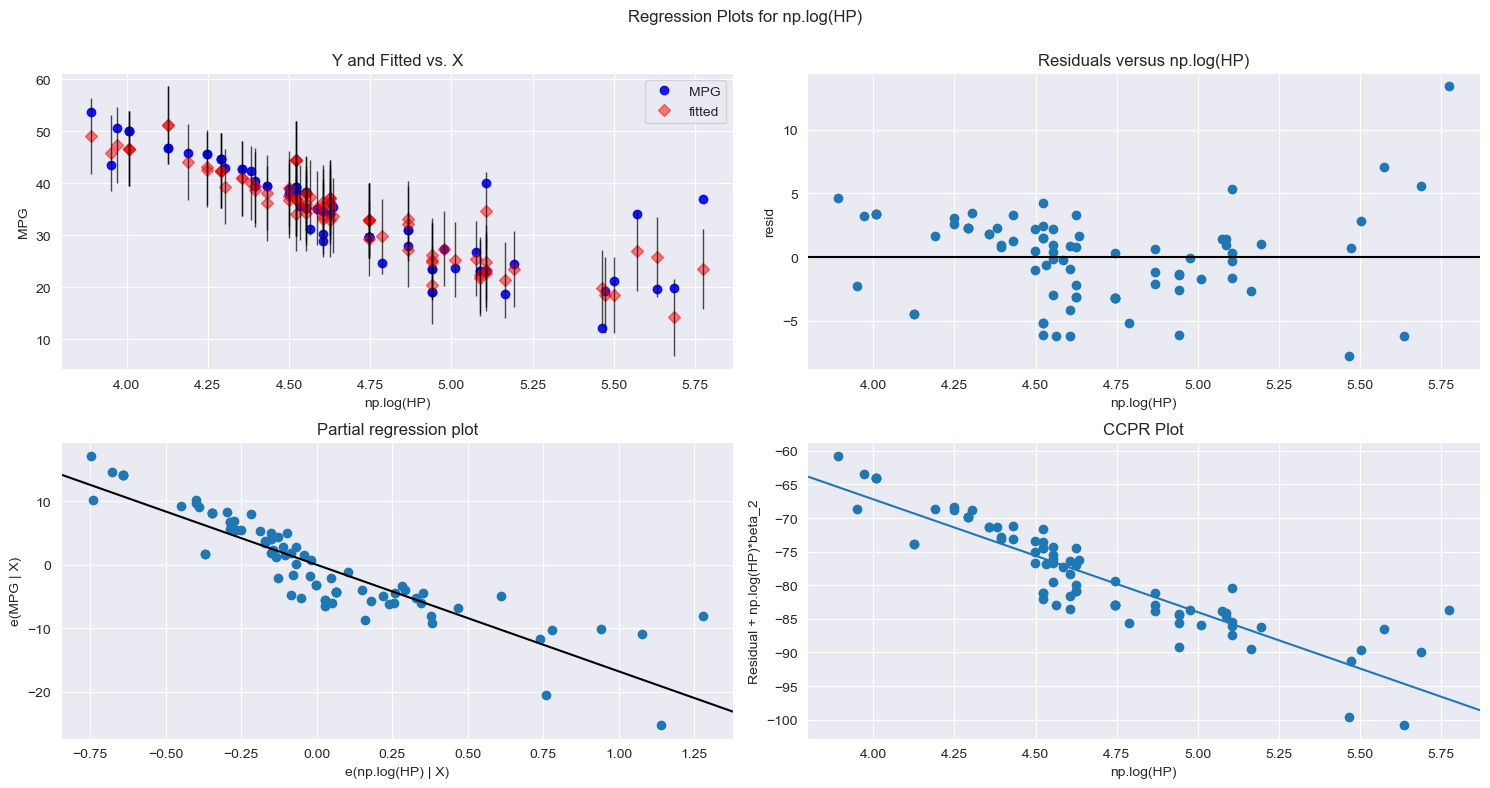

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "np.log(HP)", fig=fig)
plt.show()

In [30]:
np.log(7)

1.9459101490553132

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           6.65e-33
Time:                        10:12:06   Log-Likelihood:                -216.64
No. Observations:                  81   AIC:                             439.3
Df Residuals:                      78   BIC:                             446.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.2907      4.577     28.027      0.000     119.178     137.404
VOL           -0.1556      0.018     -8.513      0.000      -0.192      -0.119
np.log(HP)   -16.8000      0.974    -17.247      0.000     -18.739     -14.861
==============================================================================
Omnibus:                        6.263   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                7.671
Skew:                           0.320   Prob(JB):                       0.0216
Kurtosis:                       4.365   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [33]:
K=2
N=81
3*(K+1)/N

0.1111111111111111

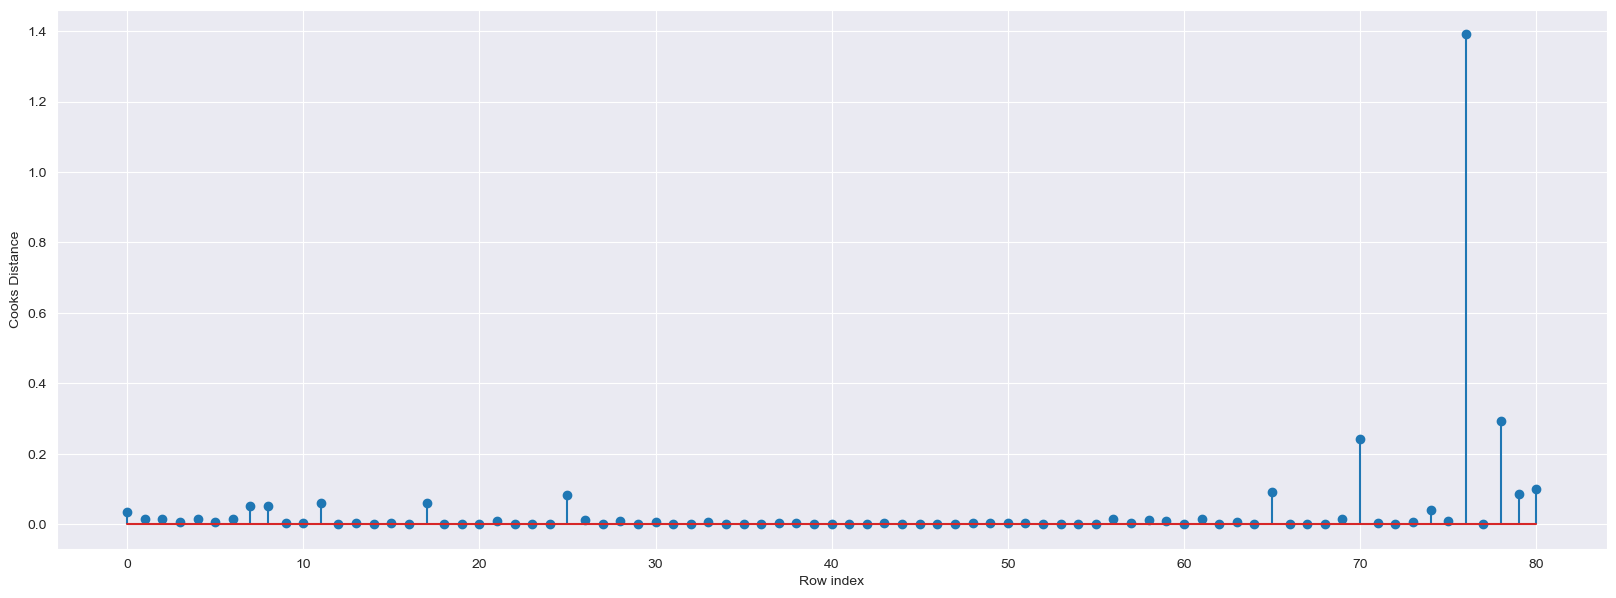

In [34]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

plt.show()

In [35]:
(np.argmax(c),np.max(c))

(76, 1.3914209608841734)

In [36]:
np.where(c>0.1111)

(array([70, 76, 78], dtype=int64),)

# Improving the model

In [37]:
#Load the data
cars_new = pd.read_csv("Cars.csv")

In [38]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76,78]],axis=0).reset_index()

In [39]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [40]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


# Build Model

In [41]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~np.log(HP)+VOL',data = car1).fit()

In [42]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.89908016461223, 392.7852339695902)

In [43]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     334.1
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           4.46e-38
Time:                        10:12:06   Log-Likelihood:                -193.39
No. Observations:                  78   AIC:                             392.8
Df Residuals:                      75   BIC:                             399.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.9145      4.163     32.645      0.000     127.621     144.208
np.log(HP)   -19.5062      1.024    -19.044      0.000     -21.547     -17.466
VOL           -0.1086      0.019     -5.764      0.000      -0.146      -0.071
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.374
Skew:                           0.082   Prob(JB):                        0.503
Kurtosis:                       3.629   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
new_HP = np.array([20])
new_VOL = np.array([30])

In [ ]:
final_ml_V.predict(new_HP, new_VOL)